In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
pd.options.display.max_columns = 100

#### Functions for draw confusion matrix and Measures

In [3]:
def drawConfusionMatrix(yTest, model, predictions):
    cm = confusion_matrix(yTest.astype(int), predictions, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()

In [28]:
def printMeasure(yTest, predictions):
    print("Precision: ", precision_score(yTest, predictions))
    print("Recall: ", recall_score(yTest, predictions))
    print('F1_score: ', f1_score(yTest, predictions))

### Reading the dataset

In [5]:
music_df = pd.read_csv('./data/msd_genre_dataset.txt')

In [6]:
music_df.shape

(59600, 34)

In [7]:
music_df.dtypes

genre              object
track_id           object
artist_name        object
title              object
loudness          float64
tempo             float64
time_signature      int64
key                 int64
mode                int64
duration          float64
avg_timbre1       float64
avg_timbre2       float64
avg_timbre3       float64
avg_timbre4       float64
avg_timbre5       float64
avg_timbre6       float64
avg_timbre7       float64
avg_timbre8       float64
avg_timbre9       float64
avg_timbre10      float64
avg_timbre11      float64
avg_timbre12      float64
var_timbre1       float64
var_timbre2       float64
var_timbre3       float64
var_timbre4       float64
var_timbre5       float64
var_timbre6       float64
var_timbre7       float64
var_timbre8       float64
var_timbre9       float64
var_timbre10      float64
var_timbre11      float64
var_timbre12      float64
dtype: object

In [8]:
music_df.head()

,genre,track_id,artist_name,title,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
0,classic pop and rock,TRFCOOU128F427AEC0,Blue Oyster Cult,Mes Dames Sarat,-8.697,155.007,1,9,1,246.33424,46.673067,14.613684,14.664215,0.176561,-9.346377,-12.341699,11.183382,7.405288,9.313765,3.201169,-0.152734,5.809709,14.930820,802.205948,1255.514569,580.030472,598.485223,575.337671,322.068603,321.726029,232.700609,186.805303,181.938688,151.508011
1,classic pop and rock,TRNJTPB128F427AE9F,Blue Oyster Cult,Screams,-10.659,148.462,1,4,0,189.80526,43.645377,-87.337150,41.051582,7.814770,-12.989848,-14.253599,6.126045,-2.448662,22.691713,-2.872706,1.427725,-6.710730,22.704843,1561.307072,2007.653070,1043.474073,585.694981,564.013736,510.177022,400.200186,365.119588,238.099708,197.933757,251.577525
2,classic pop and rock,TRLFJHA128F427AEEA,Blue Oyster Cult,Dance The Night Away,-13.494,112.909,1,10,0,158.19710,37.573538,-61.202030,28.760533,-13.788123,10.062347,-4.872030,-14.090243,5.580175,15.414011,4.556137,-1.877363,20.879475,58.459621,4644.001846,1204.856777,2736.520024,730.233239,665.203452,535.775111,439.335059,486.822970,265.333860,447.097987,251.880724
3,classic pop and rock,TRCQZAG128F427DB97,Blue Oyster Cult,Debbie Denise,-12.786,117.429,4,7,1,250.22649,42.566615,17.217897,53.484213,1.564362,-8.884632,-13.088890,-9.762620,1.373769,1.092876,1.479490,1.517015,8.562618,22.575460,691.140671,809.755802,563.908070,492.803819,378.382799,372.875044,231.941957,246.313305,168.400152,85.282462,339.897173
4,classic pop and rock,TRNXMNM128F427DB8C,Blue Oyster Cult,(Don't Fear) The Reaper,-14.093,141.536,4,9,0,307.06893,40.976507,-13.609779,39.566169,-5.602033,-17.754819,-21.833261,-5.600732,2.291770,3.526177,1.535449,2.763958,3.388757,34.294994,1062.180815,1093.684935,343.556047,889.163314,218.111796,304.862864,178.352161,440.478867,142.669283,81.061326,208.355152


In [9]:
music_df['genre'].value_counts(normalize = True)

classic pop and rock     0.400923
folk                     0.221342
dance and electronica    0.082802
jazz and blues           0.072718
soul and reggae          0.067383
punk                     0.053691
metal                    0.035285
classical                0.031443
pop                      0.027131
hip-hop                  0.007282
Name: genre, dtype: float64

In [10]:
genres = ['jazz and blues', 'soul and reggae']
music_df_filter = music_df.loc[music_df['genre'].isin(genres)]

In [11]:
music_df_filter.shape

(8350, 34)

In [12]:
music_df_filter.head()

,genre,track_id,artist_name,title,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
48942,jazz and blues,TRJBLUX12903CE16EC,John Stevens,Mango,-18.996,89.147,1,0,1,256.86159,34.738162,-50.948828,20.177101,15.139567,-25.836751,7.729854,-23.534951,-7.002408,9.661461,-0.752980,6.760097,17.112598,12.473302,1530.622764,1649.321047,1221.638146,501.717892,1091.743641,618.560018,402.236969,309.392602,233.206167,261.850703,240.834177
48943,jazz and blues,TRDPDLX12903CE16F2,John Stevens,Carnaval,-19.347,125.825,4,2,1,301.87057,34.033346,-39.733083,30.640298,19.646264,-45.231415,9.103613,-19.019581,1.119047,9.169450,3.999394,5.481075,10.958845,11.150600,1385.186042,1670.689893,1339.193474,889.918742,1148.824912,428.976969,306.187624,368.973940,227.275123,261.643570,332.356536
48944,jazz and blues,TRMWVBM128F42374DA,John Stevens,My Blue Heaven (Album Version),-9.472,121.707,4,2,1,158.85016,41.794197,-22.133118,3.518487,1.868059,13.542078,6.944006,15.406498,5.469637,4.822017,1.792601,-10.094489,-2.143374,41.497045,4513.995103,2640.398239,3070.791615,1347.758671,1499.491510,1015.076345,897.411739,608.034880,549.493210,481.149049,442.663136
48945,jazz and blues,TRMLIWL128F42374DE,John Stevens,Here_ There And Everywhere (Album Version),-14.406,83.012,5,0,1,181.26322,38.637530,-64.807191,-21.920418,-25.058971,-2.520459,-11.979187,-4.021518,-4.502840,1.350948,-6.206154,-2.557249,1.841054,26.279428,2304.536939,1187.644248,1311.170435,809.621938,612.699944,492.734025,525.801667,585.984445,278.578591,250.545027,348.842236
48946,jazz and blues,TRGFUVB128F42374E1,John Stevens,This Love (Album Version),-9.289,76.013,4,7,0,248.89424,43.089845,-27.351674,14.205832,-6.941388,21.278516,-9.627968,-6.894824,-2.730303,2.003291,-2.030266,-0.764775,1.769443,37.786419,3726.684916,1164.272074,1536.674490,1167.316436,580.604008,498.168561,607.747214,367.191519,403.532772,262.670577,272.634634


In [29]:
music_df_filter['genre'].replace({"jazz and blues" : 0, "soul and reggae" : 1}, inplace=True)
# NO FUNCIONÓ
#music_df_filter.loc[(music_df_filter.genre == 'jazz and blues'), 'genre'] = 0
#usic_df_filter.loc[(music_df_filter.genre == 'soul and reggae'), 'genre'] = 1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [30]:
# Prueba con el ajuste
print('Cantidades:\n',music_df_filter.genre.value_counts())
#print(music_df_filter.dtypes)
music_df_filter.head()

Cantidades:
 0    4334
1    4016
Name: genre, dtype: int64


,genre,track_id,artist_name,title,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
48942,0,TRJBLUX12903CE16EC,John Stevens,Mango,-18.996,89.147,1,0,1,256.86159,34.738162,-50.948828,20.177101,15.139567,-25.836751,7.729854,-23.534951,-7.002408,9.661461,-0.752980,6.760097,17.112598,12.473302,1530.622764,1649.321047,1221.638146,501.717892,1091.743641,618.560018,402.236969,309.392602,233.206167,261.850703,240.834177
48943,0,TRDPDLX12903CE16F2,John Stevens,Carnaval,-19.347,125.825,4,2,1,301.87057,34.033346,-39.733083,30.640298,19.646264,-45.231415,9.103613,-19.019581,1.119047,9.169450,3.999394,5.481075,10.958845,11.150600,1385.186042,1670.689893,1339.193474,889.918742,1148.824912,428.976969,306.187624,368.973940,227.275123,261.643570,332.356536
48944,0,TRMWVBM128F42374DA,John Stevens,My Blue Heaven (Album Version),-9.472,121.707,4,2,1,158.85016,41.794197,-22.133118,3.518487,1.868059,13.542078,6.944006,15.406498,5.469637,4.822017,1.792601,-10.094489,-2.143374,41.497045,4513.995103,2640.398239,3070.791615,1347.758671,1499.491510,1015.076345,897.411739,608.034880,549.493210,481.149049,442.663136
48945,0,TRMLIWL128F42374DE,John Stevens,Here_ There And Everywhere (Album Version),-14.406,83.012,5,0,1,181.26322,38.637530,-64.807191,-21.920418,-25.058971,-2.520459,-11.979187,-4.021518,-4.502840,1.350948,-6.206154,-2.557249,1.841054,26.279428,2304.536939,1187.644248,1311.170435,809.621938,612.699944,492.734025,525.801667,585.984445,278.578591,250.545027,348.842236
48946,0,TRGFUVB128F42374E1,John Stevens,This Love (Album Version),-9.289,76.013,4,7,0,248.89424,43.089845,-27.351674,14.205832,-6.941388,21.278516,-9.627968,-6.894824,-2.730303,2.003291,-2.030266,-0.764775,1.769443,37.786419,3726.684916,1164.272074,1536.674490,1167.316436,580.604008,498.168561,607.747214,367.191519,403.532772,262.670577,272.634634


In [31]:
music_df_filter['genre'].value_counts(normalize = True)

0    0.519042
1    0.480958
Name: genre, dtype: float64

### Splitting train and test datasets

In [32]:
X = music_df_filter[music_df_filter.columns.tolist()[4:]]

In [33]:
Y = music_df_filter['genre']

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y)

In [35]:
pd.Series(Y_train).value_counts(normalize = True)

0    0.519076
1    0.480924
Name: genre, dtype: float64

In [36]:
pd.Series(Y_test).value_counts(normalize = True)

0    0.518962
1    0.481038
Name: genre, dtype: float64

### Preprocessing feature matrix

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [38]:
X_test = scaler.transform(X_test)

### Training a Logistic Regression model

In [39]:
logmodel = LogisticRegression()

In [40]:
logmodel.fit(X_train, Y_train.astype(int))

LogisticRegression()

In [41]:
logmodel_predictions = logmodel.predict(X_test)

In [ ]:
# NO FUNCIONÓ
ConfusionMatrixDisplay.from_predictions(Y_test.astype(int), logmodel_predictions)

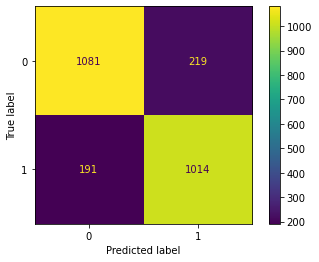

In [45]:
drawConfusionMatrix(Y_test, logmodel, logmodel_predictions)

In [46]:
printMeasure(Y_test, logmodel_predictions)

Precision:  0.8223844282238443
Recall:  0.84149377593361
F1_score:  0.8318293683347007


### Training a Neural Networks model

In [47]:
neuralmodel = MLPClassifier()

In [48]:
neuralmodel.fit(X_train, Y_train.astype(int))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [49]:
neuralmodel_predictions = neuralmodel.predict(X_test)

In [ ]:
# NO FUNCIONÓ
ConfusionMatrixDisplay.from_predictions(Y_test.astype(int), neuralmodel_predictions)

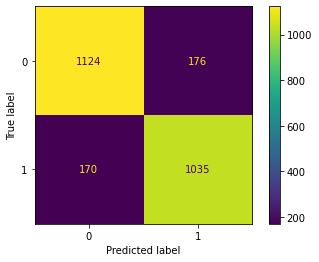

In [50]:
drawConfusionMatrix(Y_test, neuralmodel, neuralmodel_predictions)

In [51]:
printMeasure(Y_test, neuralmodel_predictions)

Precision:  0.8546655656482246
Recall:  0.8589211618257261
F1_score:  0.8567880794701986


### Training a Support Vector Machines model

In [52]:
svmmodel = SVC()

In [53]:
svmmodel.fit(X_train,Y_train.astype(int))

SVC()

In [54]:
svmmodel_predictions = svmmodel.predict(X_test)

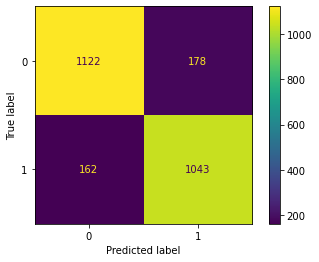

In [55]:
drawConfusionMatrix(Y_test, svmmodel, svmmodel_predictions)

In [ ]:
#NO FUNCIONÓ
ConfusionMatrixDisplay.from_predictions(Y_test.astype(int), svmmodel_predictions)

In [56]:
printMeasure(Y_test, svmmodel_predictions)

Precision:  0.8542178542178542
Recall:  0.8655601659751038
F1_score:  0.8598516075845013


### Training a Random Forest model

In [57]:
#create clasiffier
clf = RandomForestClassifier(n_estimators=100)

In [58]:
clf.fit(X_train, Y_train.astype(int))

RandomForestClassifier()

In [59]:
clf_predictions = clf.predict(X_test)

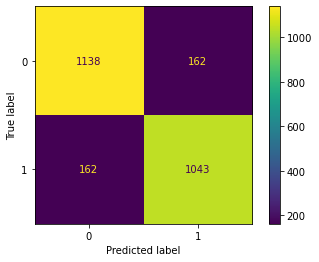

In [60]:
drawConfusionMatrix(Y_test, clf, clf_predictions)

In [61]:
printMeasure(Y_test,clf_predictions)

Precision:  0.8655601659751038
Recall:  0.8655601659751038
F1_score:  0.8655601659751038


## Segundo entrenamiento

### Training a Neural Networds model

### Read the dataset

In [75]:
genres = ['metal', 'classical']
music_df_filter1 = music_df.loc[music_df['genre'].isin(genres)]
music_df_filter1.head()

,genre,track_id,artist_name,title,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
46839,metal,TRZYQUA12903CE758D,MNEMIC,Sons Of The System,-5.072,180.016,1,10,0,240.29995,49.670804,60.616595,-1.250503,13.978898,-24.453502,-19.525889,13.613164,5.091642,-0.231408,13.209187,0.390282,-1.846266,19.215914,3137.299030,1557.312745,946.821287,451.393709,609.849348,255.307163,312.352374,314.857952,143.100204,221.082761,145.897933
46840,metal,TRHYDDL128F424C3DE,MNEMIC,Ghost,-4.846,111.002,4,1,1,335.62077,50.274717,84.682715,23.517153,-0.762290,-41.213246,-21.381801,11.139643,2.546418,-0.388439,9.405402,0.064806,3.483509,11.696920,719.728774,639.141884,618.786675,435.054526,737.162470,425.828135,289.306260,231.868961,189.057698,210.703223,156.909216
46841,metal,TRADHKC128F4292001,MNEMIC,Ghost,-5.097,111.027,4,1,1,335.62077,50.034580,85.046639,24.045478,-0.946761,-41.085097,-20.724447,11.390898,2.757842,-0.201922,9.572051,0.246968,3.357791,11.680690,718.455694,637.267315,615.351591,433.889540,696.727065,417.669179,289.993248,233.397446,187.719876,213.399502,156.013365
46842,metal,TRKJDIV128F424C3E3,MNEMIC,Blood stained,-6.066,147.984,5,1,0,437.41995,48.626407,44.787731,19.320124,8.974131,-16.588349,-23.556762,8.605912,-3.365094,6.792815,0.282344,2.503367,-1.211995,18.598470,2200.123020,1390.053508,604.562473,804.523344,514.689248,540.478361,399.735784,343.861185,224.957626,155.944348,218.477939
46843,metal,TRWEXXR128F425367B,MNEMIC,Tattoos,-5.259,125.074,3,11,0,396.64281,49.767038,88.676518,29.663460,3.505686,-46.547302,-19.689776,12.900283,1.711176,4.456213,11.117448,-0.227701,1.473160,17.208659,689.014699,716.335268,765.955838,550.621497,674.531401,377.820673,232.732456,184.245177,201.893223,201.194252,163.541505


In [76]:
music_df_filter1.shape

(3977, 34)

In [77]:
music_df_filter1['genre'].replace({"metal" : 0, "classical" : 1}, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


### Spliting train and test dataset

In [78]:
X = music_df_filter1[music_df_filter1.columns.tolist()[4:]]
Y = music_df_filter1['genre']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y)

In [79]:
print(pd.Series(Y_train).value_counts(normalize = True))
print(pd.Series(Y_test).value_counts(normalize = True))

0    0.528926
1    0.471074
Name: genre, dtype: float64
0    0.528476
1    0.471524
Name: genre, dtype: float64


### Preprocesing matrix feature

In [80]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [81]:
X_test = scaler.transform(X_test)

### Training a Neural Networks model

In [82]:
neuralmodel1 = MLPClassifier()
neuralmodel1.fit(X_train, Y_train.astype(int))
neuralmodel_predictions1 = neuralmodel1.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


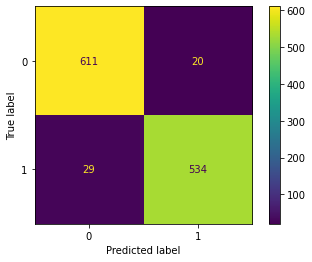

In [85]:
drawConfusionMatrix(Y_test, neuralmodel1, neuralmodel_predictions1)

In [87]:
printMeasure(Y_test, neuralmodel_predictions1)

Precision:  0.9638989169675091
Recall:  0.9484902309058615
F1_score:  0.9561324977618622


### Training a Support Vector Machine model

In [89]:
svmmodel1 = SVC()
svmmodel1.fit(X_train, Y_train.astype(int))
svmmodel_predictions1 = svmmodel1.predict(X_test)

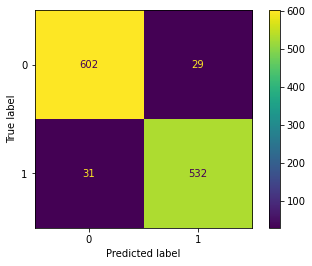

In [91]:
drawConfusionMatrix(Y_test, svmmodel1, svmmodel_predictions1)

In [92]:
printMeasure(Y_test, svmmodel_predictions1)

Precision:  0.948306595365419
Recall:  0.9449378330373002
F1_score:  0.9466192170818505
